Image classifier using the Fashion MNIST dataset.
Page 318 in book.

In [24]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [3]:
print(type(X_train))

<class 'numpy.ndarray'>


In [4]:
print(X_train.shape)

(55000, 28, 28)


In [5]:
print(X_train.dtype)

uint8


In [6]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

In [7]:
X_train, X_valid, X_test = X_train / 255.0, X_valid / 255.0, X_test / 255.0

In [8]:
print(y_train[0])

9


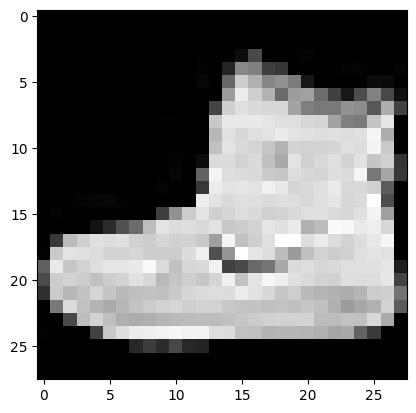

In [9]:
plt.imshow(X_train[0], cmap='gray')
plt.show()

In [10]:
# Class names for Fashion MNIST
class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
]

# Example: Get the class name for a given label
label = 0  # Replace with your label (e.g., y_train[0])
print(f"Class name for label {label}: {class_names[label]}")


Class name for label 0: T-shirt/top


In [11]:
class_names[y_train[0]]

'Ankle boot'

Creating the model using the sequential API

In [12]:
tf.random.set_seed(42)
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=[28, 28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation='relu'))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))


In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [15]:
hidden1 = model.layers[1]

In [16]:
weights, biases = hidden1.get_weights()

In [17]:
weights

array([[ 0.00103284, -0.01632147, -0.04688326, ..., -0.05291358,
        -0.03901911, -0.06281897],
       [-0.01806563, -0.07233647, -0.07041323, ..., -0.03431329,
         0.03875886,  0.00601389],
       [ 0.04613376,  0.00632299, -0.0192582 , ..., -0.0415081 ,
         0.02170745, -0.01903103],
       ...,
       [ 0.05513361,  0.01734904,  0.00821199, ..., -0.04299255,
        -0.01401317, -0.00964996],
       [-0.03189694,  0.01111897, -0.03604358, ..., -0.05040802,
        -0.01365985, -0.05355892],
       [-0.02315132,  0.03413616,  0.03251155, ...,  0.02798443,
        -0.01804899, -0.0417272 ]], dtype=float32)

In [18]:
weights.shape

(784, 300)

In [19]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [20]:
biases.shape

(300,)

In [21]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

In [22]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 903us/step - accuracy: 0.6767 - loss: 1.0280 - val_accuracy: 0.8272 - val_loss: 0.5036
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 876us/step - accuracy: 0.8258 - loss: 0.5070 - val_accuracy: 0.8426 - val_loss: 0.4496
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 853us/step - accuracy: 0.8434 - loss: 0.4544 - val_accuracy: 0.8496 - val_loss: 0.4263
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 851us/step - accuracy: 0.8527 - loss: 0.4248 - val_accuracy: 0.8504 - val_loss: 0.4115
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 876us/step - accuracy: 0.8589 - loss: 0.4031 - val_accuracy: 0.8532 - val_loss: 0.4007
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 861us/step - accuracy: 0.8651 - loss: 0.3863 - val_accuracy: 0.8558 - val_loss: 0.3940
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 861us/step - accuracy: 0.8695 - loss: 0.3720 - val_accuracy: 0.8596 - val_loss: 0.3879
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 879us/step - accuracy: 0.8728 -

<Axes: >

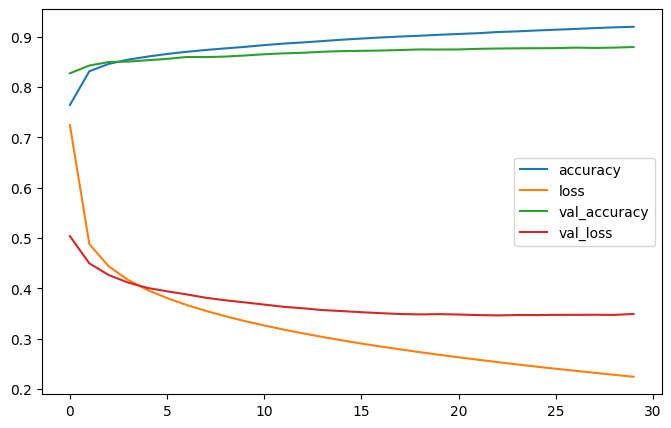

In [26]:
pd.DataFrame(history.history).plot(figsize=(8, 5))